In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
iris_data = pd.read_csv('Iris.csv')
iris_data.sample(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [4]:
iris_data_cleaned = iris_data.drop(columns=['Id', 'Species'])

In [5]:
iris_data_cleaned.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [7]:
Q1 = iris_data_cleaned.quantile(0.25)
Q3 = iris_data_cleaned.quantile(0.75)
IQR = Q3 - Q1

In [9]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
outliers= ((iris_data_cleaned < lower_bound) | (iris_data_cleaned > upper_bound)).sum()
outliers

SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [11]:
iris_data_no_outliers = iris_data_cleaned[~((iris_data_cleaned < lower_bound) | (iris_data_cleaned > upper_bound)).any(axis=1)]

In [12]:
iris_data_no_outliers.shape

(146, 4)

In [13]:
scaler= StandardScaler()
iris_scaled = scaler.fit_transform(iris_data_no_outliers)


In [15]:
pd.DataFrame(iris_scaled, columns=iris_data_no_outliers.columns).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899


In [17]:
inertia=[]
K = range(1, 11)

In [20]:
for k in K:
    kmeans= KMeans(n_clusters=k, random_state= 42)
    kmeans.fit(iris_scaled)
    inertia.append(kmeans.inertia_)

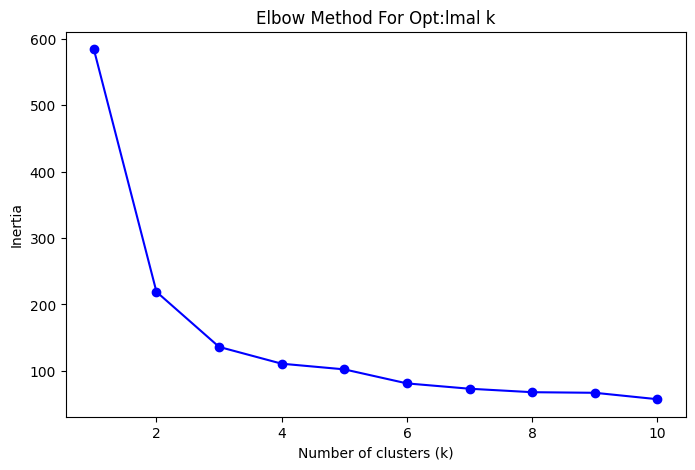

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel('Inertia')
plt.title('Elbow Method For Opt:lmal k')
plt.show()

In [24]:
#apply kmeans =3
kmeans_3 =  KMeans(n_clusters=3, random_state=42)
iris_data_no_outliers['Cluster_3']= kmeans_3.fit_predict(iris_scaled)

/var/folders/k9/8xshsk5d1hvbqhcdpjb7jb400000gn/T/ipykernel_20258/898993346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_no_outliers['Cluster_3']= kmeans_3.fit_predict(iris_scaled)


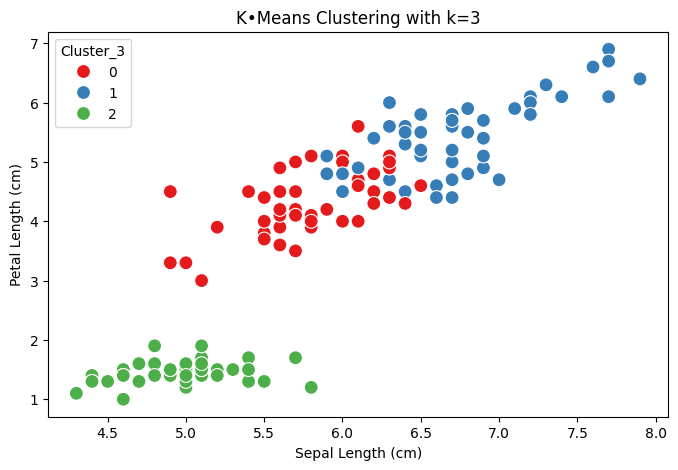

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=iris_data_no_outliers['SepalLengthCm'],
                y=iris_data_no_outliers['PetalLengthCm'],
                hue=iris_data_no_outliers[ 'Cluster_3' ],
                palette='Set1',s=100
                )

plt.title('K•Means Clustering with k=3')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()